Importing the libraries

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
#Importing the dataset
df = pd.read_csv("co2_emissions.csv")

In [162]:
#First five rows of the dataset
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [163]:
# To know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [164]:
df.shape

(7385, 12)

In [165]:
df.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

###Data cleaning

In [166]:
# Checking for null values
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [167]:
df.duplicated().sum()

1112

In [168]:
#Dropping the duplicate rows from the dataset
df = df.drop_duplicates()

In [169]:
# Summary
df.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,3.163000,5.620596,12.615591,9.073426,11.022111,27.395026,251.247250
std,1.365294,1.846424,3.550572,2.277893,2.945028,7.225472,59.235396
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


There are no null values in the dataset

In [170]:
# count the unique values of categorical Feature
df["make"].value_counts()

FORD             575
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           274
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            159
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: make, dtype: int64

In [171]:
# count the unique values of categorical Feature
df["model"].value_counts()

F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               26
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: model, Length: 2053, dtype: int64

In [172]:
# count the unique values of categorical Feature
df["vehicle_class"].value_counts()

SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               613
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      474
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [173]:
# count the unique values of categorical Feature
df["transmission"].value_counts()

AS    2720
A     1536
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

In [174]:
# count the unique values of categorical Feature
df["fuel_type"].value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

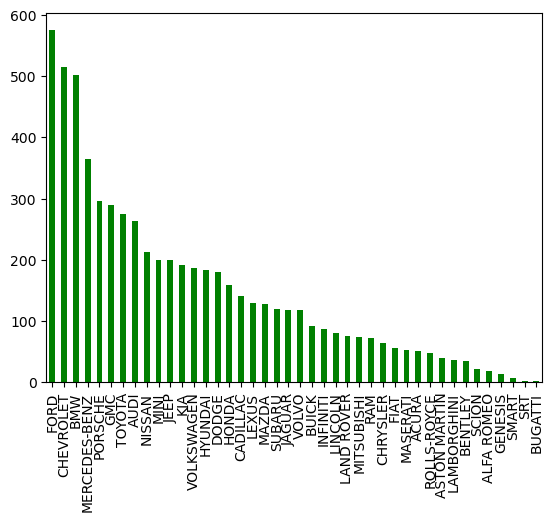

In [175]:
df['make'].value_counts().plot(kind='bar',color='g')
plt.show()

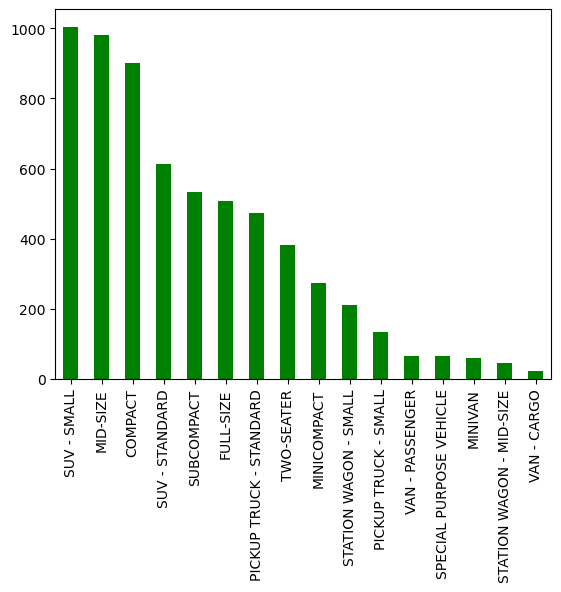

In [176]:
df['vehicle_class'].value_counts().plot(kind='bar',color='g')
plt.show()

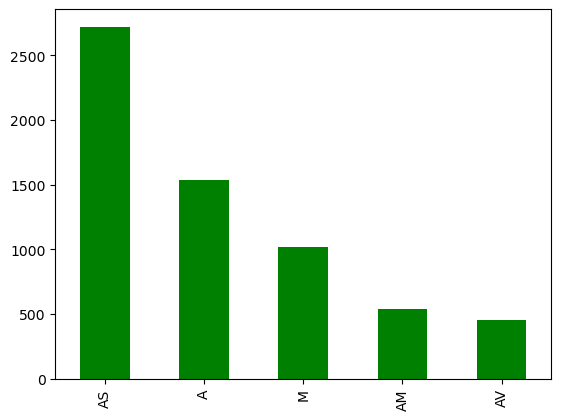

In [177]:
df['transmission'].value_counts().plot(kind='bar',color='g')
plt.show()

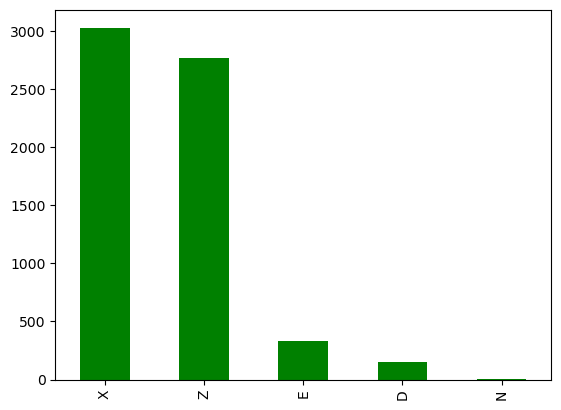

In [178]:
df['fuel_type'].value_counts().plot(kind='bar',color='g')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'COMPACT'),
  Text(1, 0, 'SUV - SMALL'),
  Text(2, 0, 'MID-SIZE'),
  Text(3, 0, 'TWO-SEATER'),
  Text(4, 0, 'MINICOMPACT'),
  Text(5, 0, 'SUBCOMPACT'),
  Text(6, 0, 'FULL-SIZE'),
  Text(7, 0, 'STATION WAGON - SMALL'),
  Text(8, 0, 'SUV - STANDARD'),
  Text(9, 0, 'VAN - CARGO'),
  Text(10, 0, 'VAN - PASSENGER'),
  Text(11, 0, 'PICKUP TRUCK - STANDARD'),
  Text(12, 0, 'MINIVAN'),
  Text(13, 0, 'SPECIAL PURPOSE VEHICLE'),
  Text(14, 0, 'STATION WAGON - MID-SIZE'),
  Text(15, 0, 'PICKUP TRUCK - SMALL')])

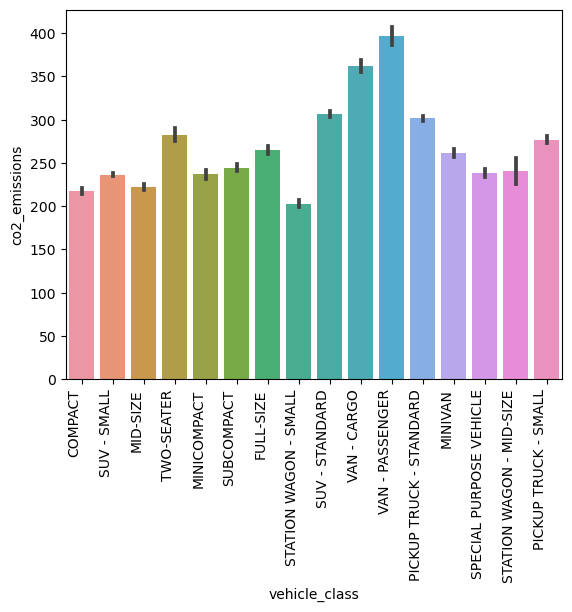

In [179]:
sns.barplot(x='vehicle_class', y="co2_emissions",  data=df)
plt.xticks(rotation=90, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'ACURA'),
  Text(1, 0, 'ALFA ROMEO'),
  Text(2, 0, 'ASTON MARTIN'),
  Text(3, 0, 'AUDI'),
  Text(4, 0, 'BENTLEY'),
  Text(5, 0, 'BMW'),
  Text(6, 0, 'BUICK'),
  Text(7, 0, 'CADILLAC'),
  Text(8, 0, 'CHEVROLET'),
  Text(9, 0, 'CHRYSLER'),
  Text(10, 0, 'DODGE'),
  Text(11, 0, 'FIAT'),
  Text(12, 0, 'FORD'),
  Text(13, 0, 'GMC'),
  Text(14, 0, 'HONDA'),
  Text(15, 0, 'HYUNDAI'),
  Text(16, 0, 'INFINITI'),
  Text(17, 0, 'JAGUAR'),
  Text(18, 0, 'JEEP'),
  Text(19, 0, 'KIA'),
  Text(20, 0, 'LAMBORGHINI'),
  Text(21, 0, 'LAND ROVER'),
  Text(22, 0, 'LEXUS'),
  Text(23, 0, 'LINCOLN'),
  Text(24, 0, 'MASERATI'),
  Text(25, 0, 'MAZDA'),
  Text(26, 0, 'MERCEDES-BENZ'),
  Text(27, 0, 'MINI'),
  Text(28, 0, 'MITSUBISHI'),
  Text(29, 0, 'NISSAN'),
  Text(30, 0, 'PORSCHE'),
  Text(31, 0, 'RAM'),

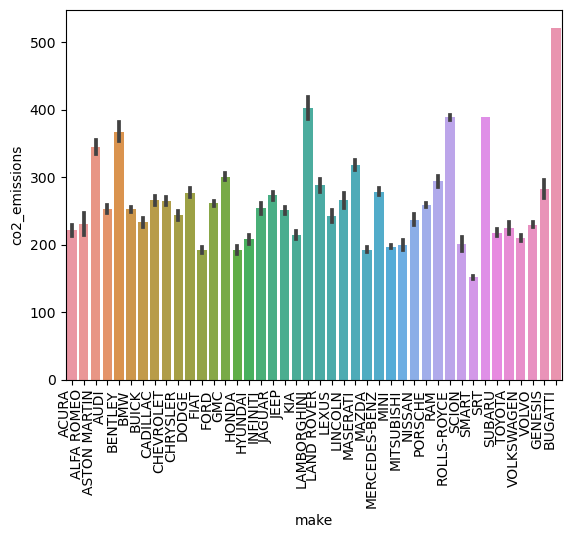

In [180]:
sns.barplot(x='make', y="co2_emissions",  data=df)
plt.xticks(rotation=90, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AS'),
  Text(1, 0, 'M'),
  Text(2, 0, 'AV'),
  Text(3, 0, 'AM'),
  Text(4, 0, 'A')])

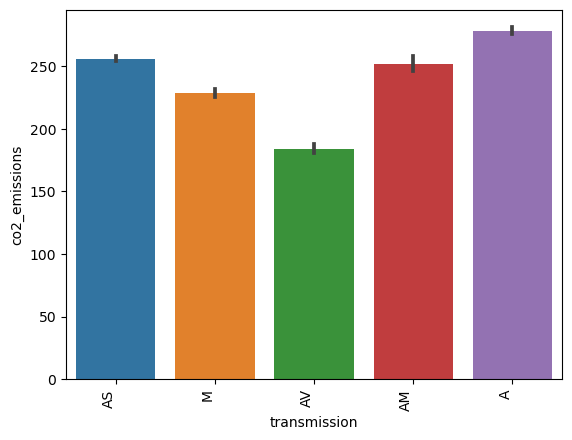

In [181]:
sns.barplot(x='transmission', y="co2_emissions",  data=df)
plt.xticks(rotation=90, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Z'),
  Text(1, 0, 'D'),
  Text(2, 0, 'X'),
  Text(3, 0, 'E'),
  Text(4, 0, 'N')])

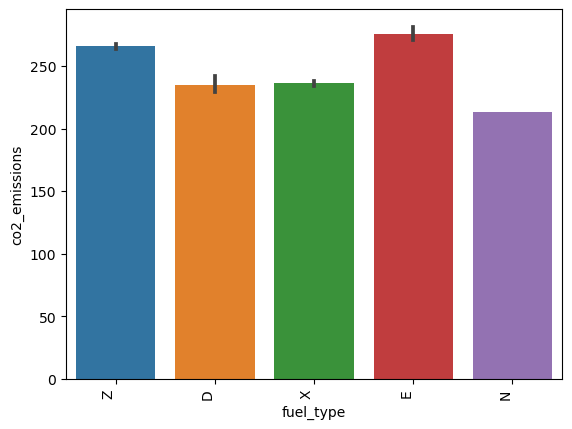

In [182]:
sns.barplot(x='fuel_type', y="co2_emissions",  data=df)
plt.xticks(rotation=90, ha='right')

In [183]:
make_co2 = df.groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = df.groupby('model')['co2_emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = df.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = df.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = df.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).head()

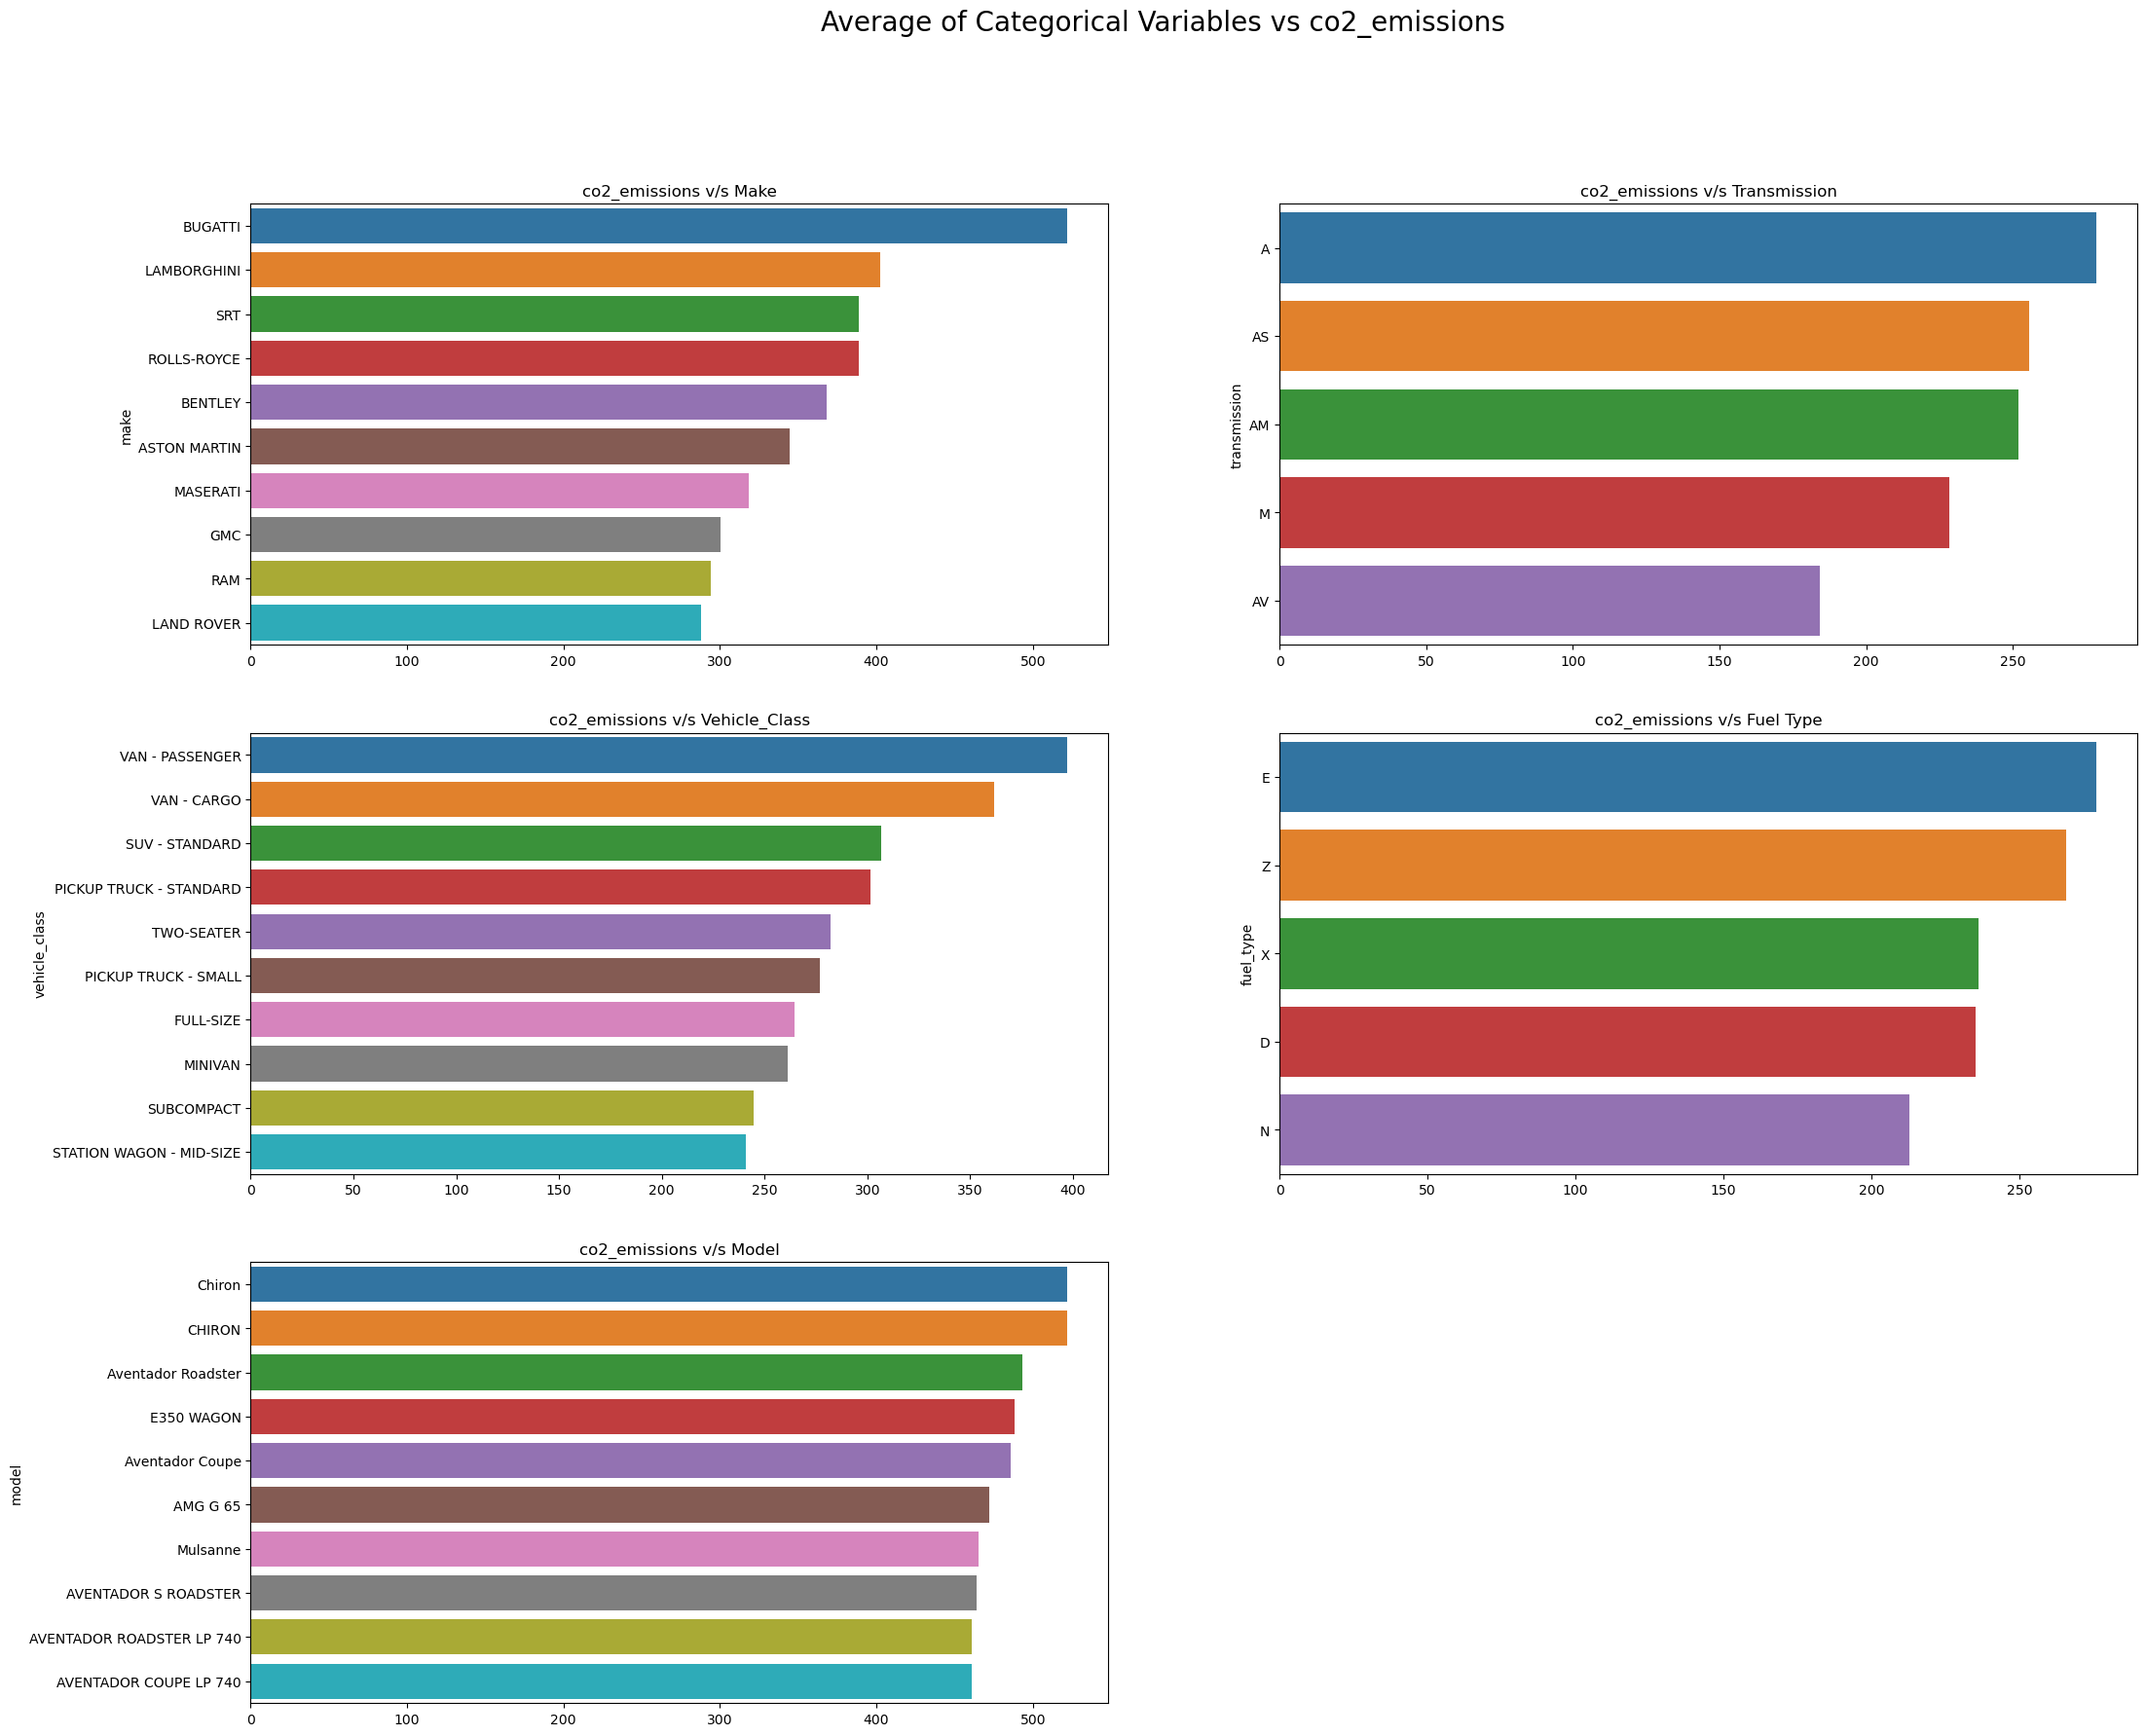

In [184]:
fig, axes = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Average of Categorical Variables vs co2_emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index)
axes[0][0].set_title('co2_emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index)
axes[0][1].set_title('co2_emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[1][0].set_title('co2_emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[1][1].set_title('co2_emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index)
axes[2][0].set_title('co2_emissions v/s Model')


fig.delaxes(axes[2][1])
plt.show()

<Axes: xlabel='co2_emissions', ylabel='cylinders'>

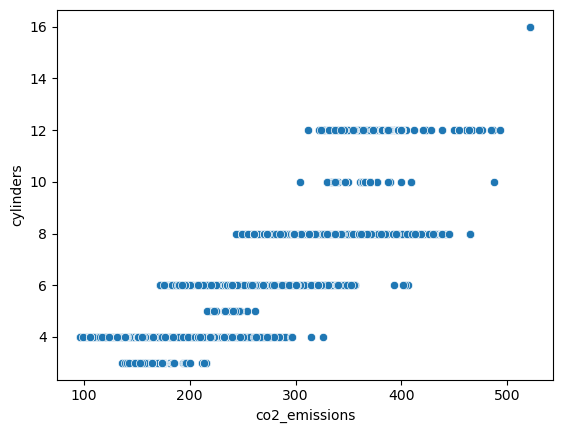

In [185]:
#Relationship between cylinders and co2 emissions
sns.scatterplot(x='co2_emissions',y='cylinders',data = df)

From the above scatter plot we can see that:

As the number of cylinders increase, the CO2 emissions increase
Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2
Fuel Type Z results in more CO2 emissions than the other

<Figure size 1000x500 with 0 Axes>

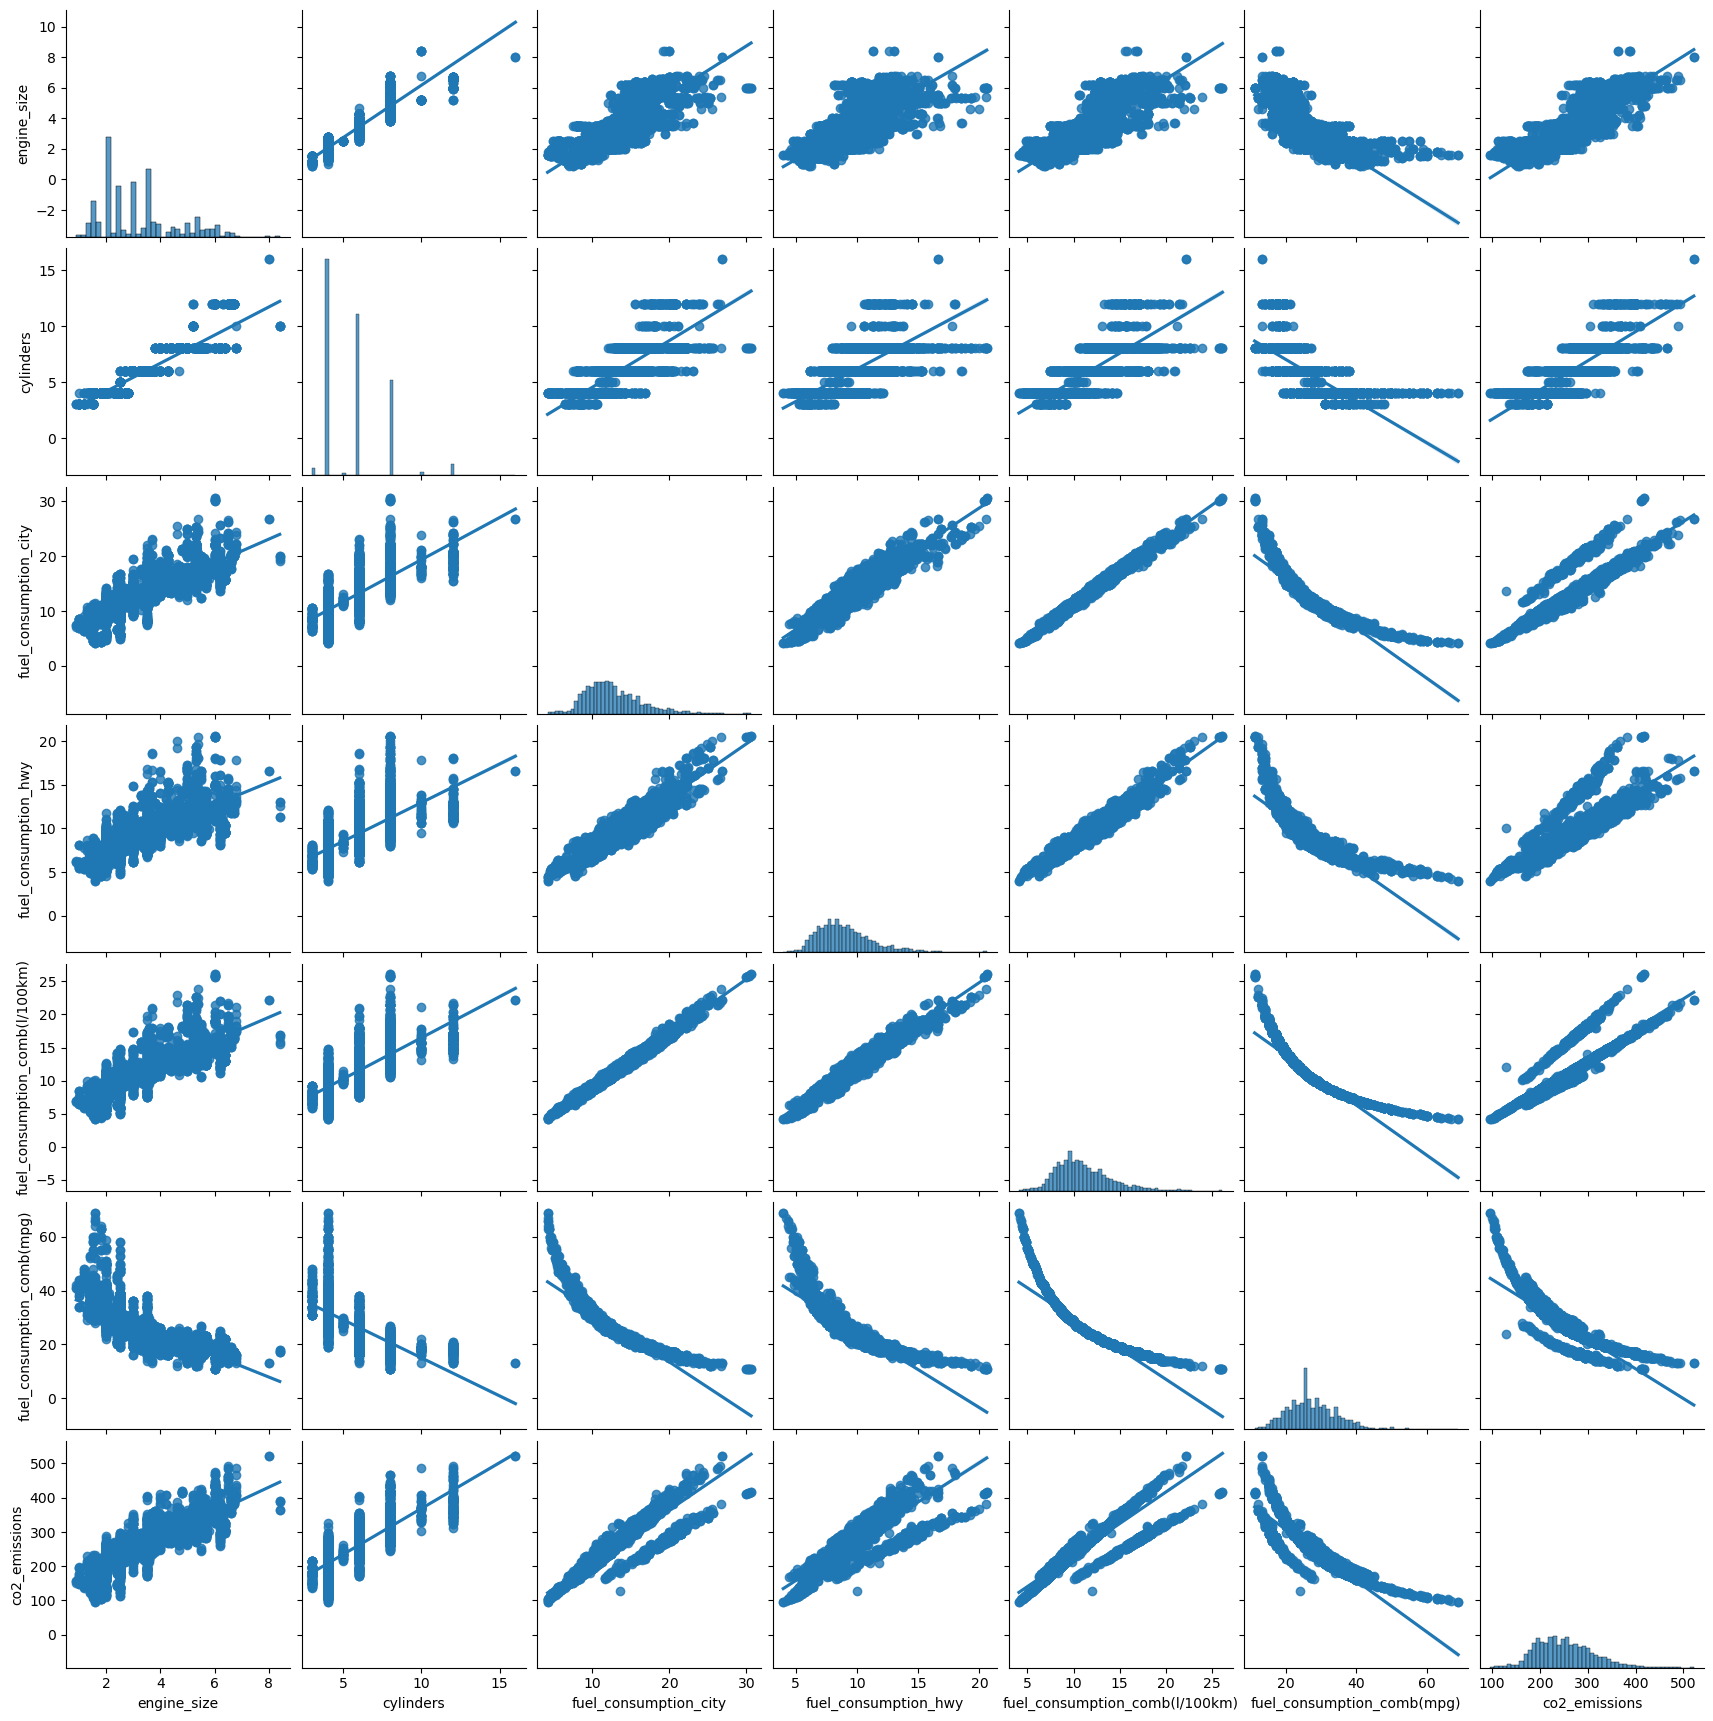

In [186]:
plt.figure(figsize=(10,5))
sns.pairplot(df,kind="reg")
plt.show()

<Axes: >

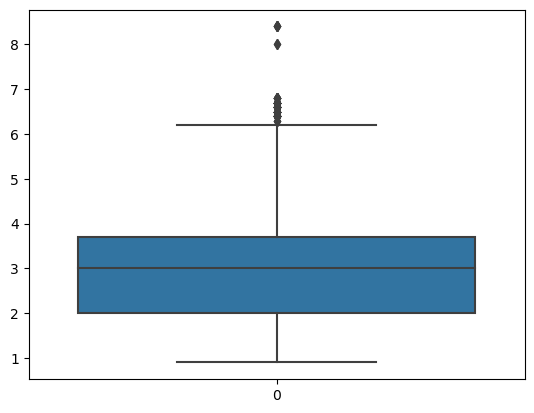

In [187]:
sns.boxplot(df['engine_size'])

Dealing with outliers in engine_size column

In [188]:
Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.7000000000000002


In [189]:
#upper quartile
Q3+1.5*IQR

6.25

In [190]:
df=df[df['engine_size']<6.25]

Dealing with outliers in cylinder column

<Axes: >

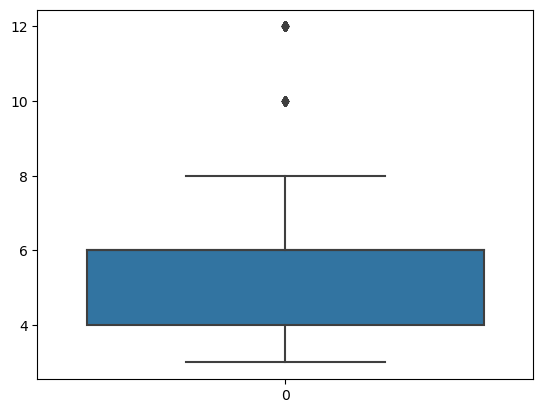

In [191]:
sns.boxplot(df['cylinders'])

In [192]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.0


In [193]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

(1.0, 9.0)

In [194]:
df=df[df['cylinders']< 9.0]

<Axes: >

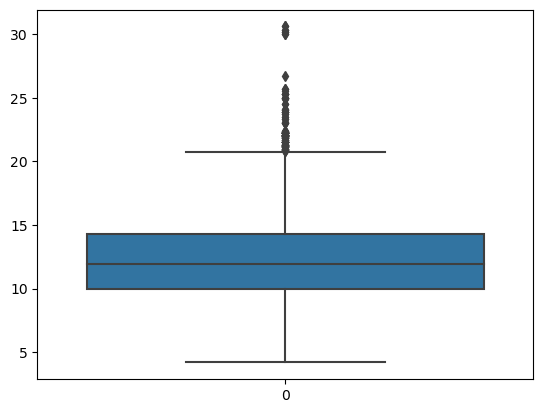

In [195]:
sns.boxplot(df['fuel_consumption_city'])

<Axes: >

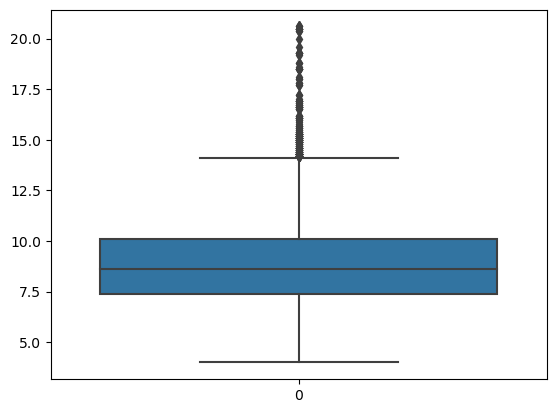

In [196]:
sns.boxplot(df['fuel_consumption_hwy'])

<Axes: >

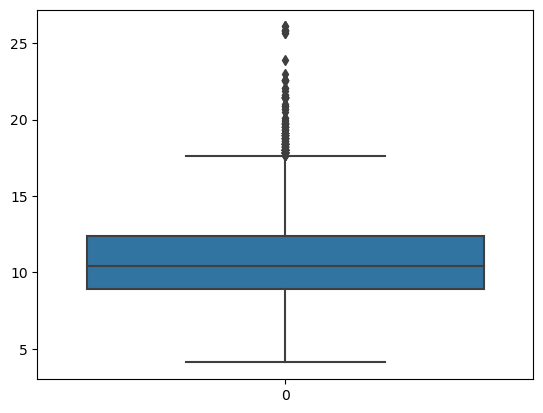

In [197]:
sns.boxplot(df['fuel_consumption_comb(l/100km)'])

<Axes: >

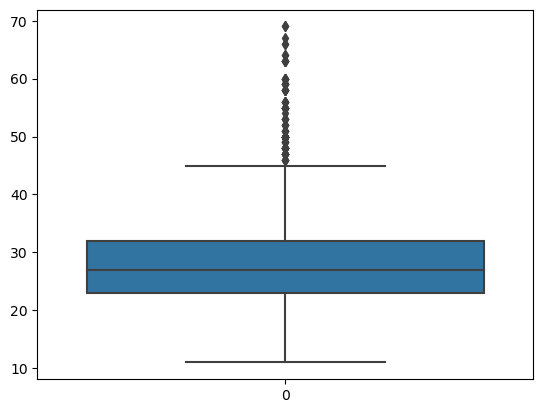

In [198]:
sns.boxplot(df['fuel_consumption_comb(mpg)'])

<Axes: >

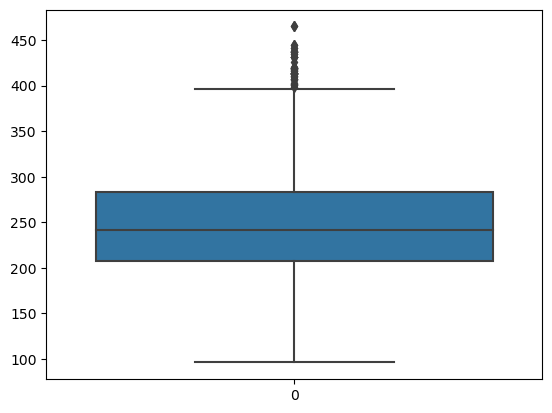

In [199]:
sns.boxplot(df['co2_emissions'])

In [200]:
#Dropping unnecessary features
df.drop(['model'],axis=1,inplace=True)

Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , we have dropped this column

In [201]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    
    return(vif)

In [202]:
features=df.iloc[:,2:4]
print(features.head())
calculate_vif(features)

   engine_size  cylinders
0          2.0          4
1          2.4          4
2          1.5          4
3          3.5          6
4          3.5          6


,features,VIF_Value
0,engine_size,40.199033
1,cylinders,40.199033


In [203]:
features=df.iloc[:,6:10]
print(features.head())
calculate_vif(features)

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   
1                   11.2                   7.7   
2                    6.0                   5.8   
3                   12.7                   9.1   
4                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  
0                             8.5                          33  
1                             9.6                          29  
2                             5.9                          48  
3                            11.1                          25  
4                            10.6                          27  


,features,VIF_Value
0,fuel_consumption_city,28486.040526
1,fuel_consumption_hwy,10028.500456
2,fuel_consumption_comb(l/100km),71432.744990
3,fuel_consumption_comb(mpg),5.054554


C:\Users\akhil\AppData\Local\Temp\ipykernel_5276\864000481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap=None, center=0)


<Axes: >

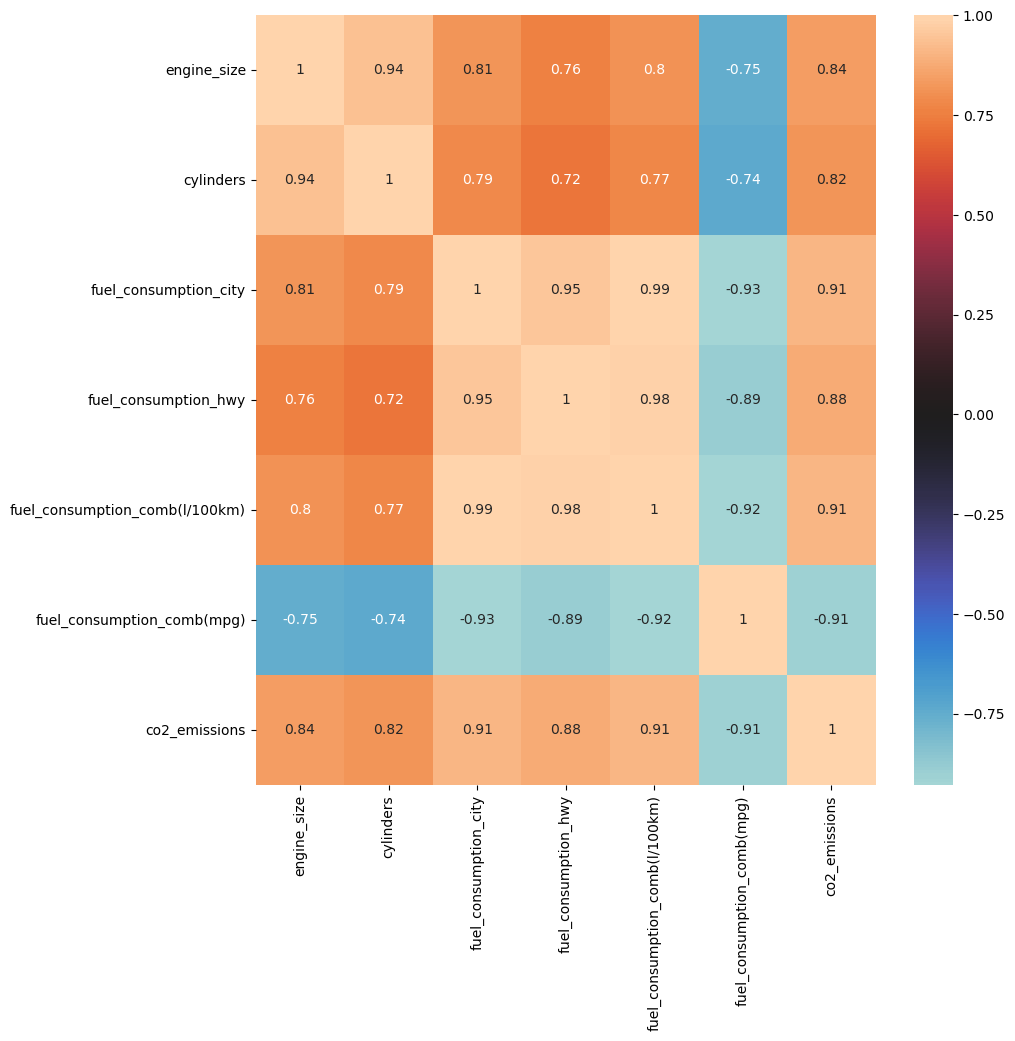

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap=None, center=0)

In [205]:
def correlation(df,threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
          colname = corr_matrix.columns[i]
          col_corr.add(colname)
    return col_corr

In [206]:
corr_features = correlation(df,0.9)
len(set(corr_features))

C:\Users\akhil\AppData\Local\Temp\ipykernel_5276\2560853650.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


5

In [207]:
corr_features

{'co2_emissions',
 'cylinders',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_comb(mpg)',
 'fuel_consumption_hwy'}

In [208]:
#Dropping features having high correlation
df.drop(['fuel_consumption_city'],axis=1,inplace=True)
df.drop(['engine_size'],axis=1,inplace=True)
df.drop(['fuel_consumption_comb(mpg)'],axis=1,inplace=True)

In [209]:
df=df.rename({'fuel_consumption_comb(l/100km)':'fuel_comb_l'},axis=1)

Handling categorical columns

In [210]:
df['make']=df['make'].astype('category')
df['vehicle_class']=df['vehicle_class'].astype('category')
df['transmission']=df['transmission'].astype('category')
df['fuel_type']=df['fuel_type'].astype('category')

In [211]:
df['make']=df['make'].cat.codes
df['vehicle_class']=df['vehicle_class'].cat.codes
df['transmission']=df['transmission'].cat.codes
df['fuel_type']=df['fuel_type'].cat.codes

<Axes: >

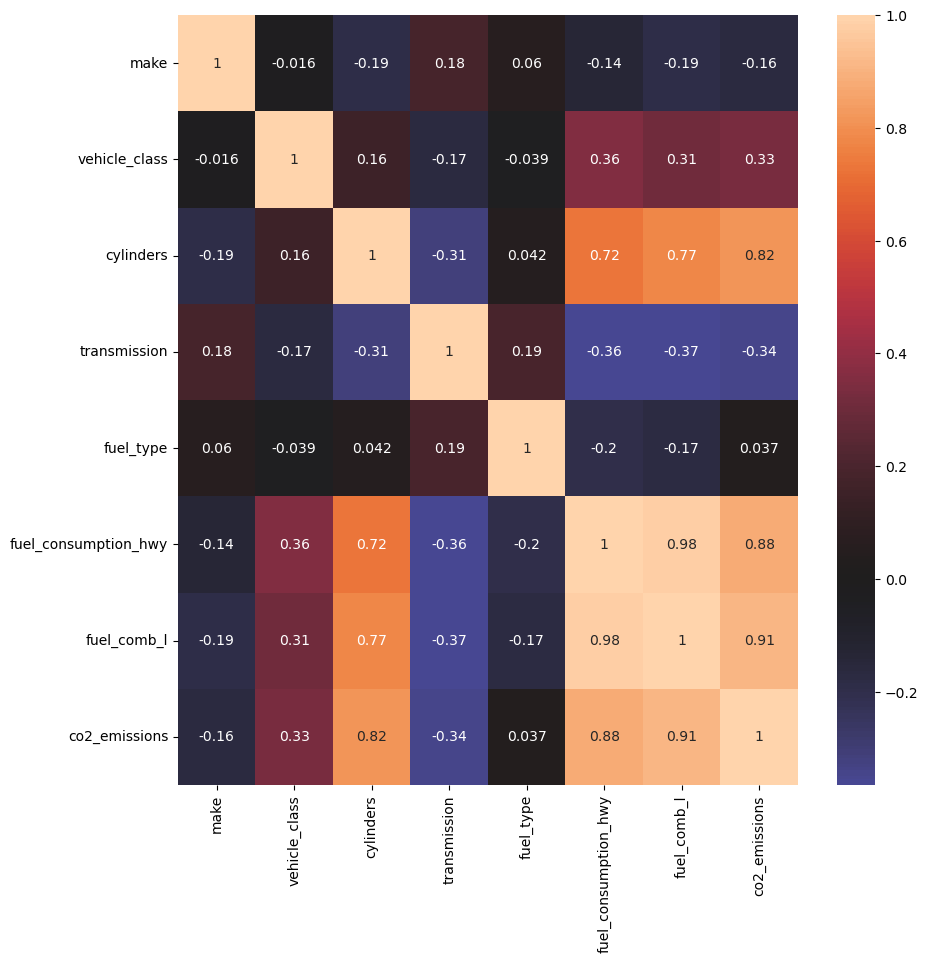

In [212]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap=None, center=0)

In [213]:
df.head()

,make,vehicle_class,cylinders,transmission,fuel_type,fuel_consumption_hwy,fuel_comb_l,co2_emissions
0,0,0,4,2,4,6.7,8.5,196
1,0,0,4,4,4,7.7,9.6,221
2,0,0,4,3,4,5.8,5.9,136
3,0,11,6,2,4,9.1,11.1,255
4,0,11,6,2,4,8.7,10.6,244


# Linear Regression Model

In [214]:
x=df.iloc[:,:7]
y=df.iloc[:,7]

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

### Model 1

In [216]:
model1=LinearRegression()

In [217]:
model1.fit(x_train,y_train)

LinearRegression()

In [218]:
y_pred=model1.predict(x_test)

In [219]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Output of Model 1

In [220]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 337.322148355151
Root Mean Squared Error (RMSE): 18.366331924343278
R-squared (R2) Score: 0.8920535489096141


### Model 1 with standardization

In [221]:
#Standardisation
st = StandardScaler()
x_train1=st.fit_transform(x_train)
x_test1= st.transform(x_test)

In [222]:
model2=LinearRegression()

In [223]:
model2.fit(x_train1,y_train)

LinearRegression()

In [224]:
y_pred=model2.predict(x_test1)

In [225]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [226]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 337.3221483551509
Root Mean Squared Error (RMSE): 18.366331924343275
R-squared (R2) Score: 0.8920535489096141


### K fold Cross validation for Model 1

In [227]:
model=model1
Kfold_validation=KFold(10)

In [228]:
results=cross_val_score(model,x,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.824389   0.88792198 0.88160896 0.86270653 0.91009167 0.86579134
 0.87168473 0.88658786 0.884195   0.90251532]
0.8777492392513684


so the mean crossvalidation score is not bigger than the model score so no need to do further hyper parameter tuning

### K fold Cross validation for Model 1 with standardization

In [229]:
model=model2
Kfold_validation=KFold(10)

In [230]:
results=cross_val_score(model,x,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.824389   0.88792198 0.88160896 0.86270653 0.91009167 0.86579134
 0.87168473 0.88658786 0.884195   0.90251532]
0.8777492392513684


here also the mean crossvalidation score is not bigger than the model score so no need to do further hyper parameter tuning

# Model 2 Random Forest Regression

In [231]:
model3 = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
model3.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [232]:
y_pred = model3.predict(x_test)

In [233]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 10.231646068082599
Root Mean Squared Error (RMSE): 3.198694431808484
R-squared (R2) Score: 0.9967257712330838


### k fold Cross validation Model 3


In [234]:
model=model3
Kfold_validation=KFold(10)

In [235]:
results=cross_val_score(model,x,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.99406849 0.99534785 0.99476851 0.99588393 0.99578176 0.99531758
 0.9919678  0.9965897  0.99828432 0.9983129 ]
0.9956322848209609


here also the mean crossvalidation score is not bigger than the model score so no need to do further hyper parameter tuning

From these model we see that Random forest model is performing well than other models

#Deployment

In [236]:
# saving the model
import pickle
pickle_out = open("proj.pkl", mode = "wb")
pickle.dump(model1, pickle_out)
pickle_out.close()

In [237]:
# saving the model
import pickle
pickle_out = open("model3.pkl", mode = "wb")
pickle.dump(model3, pickle_out)
pickle_out.close()

In [241]:
print("Actual\tPredicted")
print("------\t----------")
for actual, predicted in zip(y_test, y_pred):
    print(f"{actual}\t{predicted:.2f}")

Actual	Predicted
------	----------
240	238.49
253	255.06
301	292.85
233	230.42
218	221.32
268	266.78
271	272.27
198	201.84
229	228.39
294	297.81
227	227.01
238	237.07
241	239.48
242	244.50
225	221.51
225	224.00
130	131.19
189	189.57
253	252.69
262	265.94
254	257.05
240	236.33
265	262.39
121	120.46
235	237.25
331	329.57
275	276.14
209	209.17
265	259.47
276	278.96
264	264.33
321	320.35
232	230.23
194	194.41
283	284.45
199	197.09
288	291.64
445	439.00
306	309.85
186	185.11
193	196.37
222	221.47
308	306.61
248	248.16
209	207.35
228	230.64
290	290.31
334	339.05
214	217.04
237	235.34
156	157.80
220	219.27
252	251.93
265	267.02
196	193.05
283	283.88
105	104.41
280	279.26
253	249.01
375	372.36
250	247.88
324	323.15
182	181.06
301	302.89
133	132.35
279	277.56
357	357.55
217	214.92
247	246.76
298	328.52
275	271.24
168	167.45
382	381.60
166	167.21
299	296.66
224	223.21
343	338.95
186	186.99
185	184.16
281	280.26
244	246.32
259	258.45
336	338.72
243	240.52
183	181.27
238	237.19
276	274.91
292	290.